In [ ]:
# mount your own google drive
from google.colab import drive
drive.mount('/content/drive')

# change working directory 
%cd /content/drive/My Drive/Assignment2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Assignment2


In [ ]:
import pandas as pd

# read CSV file into a pandas DataFrame
df = pd.read_csv('cuisine_df.csv')

# print first 5 rows of the DataFrame
print(df.head())


       id   cuisine
0  344373    French
1  233186    French
2  113876  Japanese
3  445310    French
4  306344    French


In [ ]:
# Do not have to download every time
!wget "http://seppe.net/aa/assignment2/images.zip"

--2023-05-06 17:48:11--  http://seppe.net/aa/assignment2/images.zip
Resolving seppe.net (seppe.net)... 37.139.1.16
Connecting to seppe.net (seppe.net)|37.139.1.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21223409265 (20G) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  19.77G  12.9MB/s    in 20m 24s 

2023-05-06 18:08:35 (16.5 MB/s) - ‘images.zip.1’ saved [21223409265/21223409265]



In [ ]:
# Package: to add a progress bar to the upzip processing.
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm.notebook import tqdm_notebook

# convert id into str list, it defines what id(images) we need to extract 
file_ids = list(df['id'].astype(str))

# command for extracting and progressing bar
command = '7z x images.zip '
for file_id, i in tqdm_notebook(zip(file_ids, range(len(file_ids)))):
    command += f"-ir!{file_id}.jpg "
    if i % 100 == 0:  # update processing bar every 100
        tqdm_notebook.write(f"Unzipping file {i + 1} of {len(file_ids)}")

# run in Colab
os.system(command)


0it [00:00, ?it/s]

Unzipping file 1 of 3504
Unzipping file 101 of 3504
Unzipping file 201 of 3504
Unzipping file 301 of 3504
Unzipping file 401 of 3504
Unzipping file 501 of 3504
Unzipping file 601 of 3504
Unzipping file 701 of 3504
Unzipping file 801 of 3504
Unzipping file 901 of 3504
Unzipping file 1001 of 3504
Unzipping file 1101 of 3504
Unzipping file 1201 of 3504
Unzipping file 1301 of 3504
Unzipping file 1401 of 3504
Unzipping file 1501 of 3504
Unzipping file 1601 of 3504
Unzipping file 1701 of 3504
Unzipping file 1801 of 3504
Unzipping file 1901 of 3504
Unzipping file 2001 of 3504
Unzipping file 2101 of 3504
Unzipping file 2201 of 3504
Unzipping file 2301 of 3504
Unzipping file 2401 of 3504
Unzipping file 2501 of 3504
Unzipping file 2601 of 3504
Unzipping file 2701 of 3504
Unzipping file 2801 of 3504
Unzipping file 2901 of 3504
Unzipping file 3001 of 3504
Unzipping file 3101 of 3504
Unzipping file 3201 of 3504
Unzipping file 3301 of 3504
Unzipping file 3401 of 3504
Unzipping file 3501 of 3504


0

In [ ]:
# install package for model training
!install keras

In [ ]:
import pandas as pd
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from keras import regularizers
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# define path to images and csv file (contain id and target)
images_dir = 'images/'
csv_file_path = 'cuisine_df.csv'

# read csv file
df = pd.read_csv(csv_file_path)

# extract id and label for images (here, id and cuisine)
X = []
y = []
for index, row in df.iterrows():
    img_file_path = os.path.join(images_dir, str(row['id']) + '.jpg')
    if os.path.exists(img_file_path):
        img = cv2.imread(img_file_path)
        img = cv2.resize(img, (128, 128))
        X.append(img)
        y.append(row['cuisine'])

# encoding target class
classes = ['Chinese', 'French', 'Italian', 'Japanese']
y = [classes.index(label) for label in y]

# split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# convert image data to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)

# convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


# CNN model training
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3), kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.005)))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax', kernel_regularizer=regularizers.l2(0.005))) # we have 4 classes 

# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# model fitting
history = model.fit(X_train, y_train, epochs=9, batch_size=33, validation_data=(X_test, y_test))

# model evaluation
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)


Epoch 1/9
4/4 [==============================] - 16s 3s/step - loss: 142.7942 - accuracy: 0.2500 - val_loss: 30.4326 - val_accuracy: 0.2647
Epoch 2/9
4/4 [==============================] - 9s 2s/step - loss: 25.7392 - accuracy: 0.3561 - val_loss: 4.4313 - val_accuracy: 0.4412
Epoch 3/9
4/4 [==============================] - 10s 2s/step - loss: 4.0959 - accuracy: 0.3864 - val_loss: 3.7259 - val_accuracy: 0.3824
Epoch 4/9
4/4 [==============================] - 11s 3s/step - loss: 3.6082 - accuracy: 0.4924 - val_loss: 3.6827 - val_accuracy: 0.3824
Epoch 5/9
4/4 [==============================] - 10s 2s/step - loss: 3.4146 - accuracy: 0.6515 - val_loss: 3.7999 - val_accuracy: 0.4412
Epoch 6/9
4/4 [==============================] - 11s 3s/step - loss: 3.2624 - accuracy: 0.6894 - val_loss: 3.9526 - val_accuracy: 0.3824
Epoch 7/9
4/4 [==============================] - 9s 2s/step - loss: 3.0395 - accuracy: 0.8258 - val_loss: 3.8876 - val_accuracy: 0.4412
Epoch 8/9
4/4 [========================

2/2 [==============================] - 1s 87ms/step


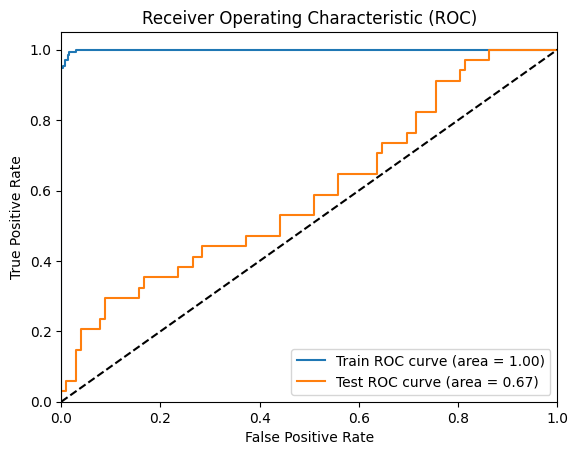

In [ ]:
# AUC 
y_train_pred = model.predict(X_train)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train.ravel(), y_train_pred.ravel())
auc_train = auc(fpr_train, tpr_train)

y_test_pred = model.predict(X_test)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test.ravel(), y_test_pred.ravel())
auc_test = auc(fpr_test, tpr_test)

# ROC Plot
import matplotlib.pyplot as plt
plt.plot(fpr_train, tpr_train, label='Train ROC curve (area = %0.2f)' % auc_train)
plt.plot(fpr_test, tpr_test, label='Test ROC curve (area = %0.2f)' % auc_test)
plt.plot([0, 1], [0, 1], 'k--') # 对角线
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# save model as .h5 file
model.save('cuisine_model.h5')
